# Paso 4. Análisis exploratorio de datos (Python)

# 1. Importación de datos y librerías

## 1.1 Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
import scipy.stats as st

## 1.2 Análisis CSV 01 y CSV 04
CSV 01
- company_name: nombre de la empresa de taxis
- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

CSV 04
- dropoff_location_name: barrios de Chicago donde finalizaron los viajes
- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

### 1- Importando datos CSV 01 y CSV 04

In [2]:
# CSV 01
df_trips_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
print("project_sql_result_01.csv cargado exitosamente.")

# CSV 04
df_dropoff_locations = pd.read_csv('/datasets/project_sql_result_04.csv')
print("project_sql_result_04.csv cargado exitosamente.")

project_sql_result_01.csv cargado exitosamente.
project_sql_result_04.csv cargado exitosamente.


### 2- Estudio de datos

#### CSV 01

In [3]:
print(df_trips_companies.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [4]:
# Nan
df_trips_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
df_trips_companies.shape

(64, 2)

In [6]:
# Redondeo a cero decimales
df_trips_companies.describe().round(0)

,trips_amount
count,64.0
mean,2145.0
std,3812.0
min,2.0
25%,21.0
50%,178.0
75%,2106.0
max,19558.0


En df_trips_companies la mediana (50%) es 178.0 y media es 2145.0; son muy distintas
- La media más alta que la mediana (2145 vs 178) indica una distribución de datos sesgada a la derecha o con un sesgo positivo.
- Típico de valores atípicos (outliers) o pequeño número de valores extremadamente grandes.
- La mediana sugiere que el 50% de compañías de taxis tuvieron 178 viajes o menos (y el otro 50% tuvo 178 viajes o más). Número relativamente bajo de viajes.
- La media indica que algunas compañías (o una compañía) tuvo una cantidad excepcionalmente alta de viajes.
- El max de 19558 confirma la existencia de al menos una compañía con un número muy alto de viajes.



Conclusión hipotética: La mayoría de empresas de taxis realizan un número moderado de viajes y otras pocas dominan el mercado con un volumen de viajes muy alto. (hacer histograma o boxplot)

#### CSV 04

In [7]:
print(df_dropoff_locations.head())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [8]:
# Nan
df_dropoff_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
df_dropoff_locations.shape

(94, 2)

In [10]:
# Redondeo a cero decimales
df_dropoff_locations.describe().round(0)

,average_trips
count,94.0
mean,600.0
std,1715.0
min,2.0
25%,14.0
50%,52.0
75%,299.0
max,10727.0


En df_dropoff_locations la mediana (50%) es 52.0, mientras que la media es 600.0.
- La mediana de 52.0 significa que el 50% de los barrios tuvieron un promedio de 52.0 viajes finalizados o menos (y el otro 50% tuvo 52.0 viajes o más). Esto sugiere que la mayoría de los barrios tienen un promedio relativamente bajo de viajes finalizados.
- La media de 600.0 es considerablemente más alta, lo que indica que hay algunos barrios (o un pequeño grupo de barrios) que recibieron un volumen de viajes finalizados excepcionalmente alto, elevando significativamente el promedio general.
- El max de 10727.0 confirma la existencia de al menos un barrio con un promedio de viajes finalizados extremadamente alto, lo que respalda esta hipótesis de sesgo.

Conclusión: Existe una gran disparidad en el promedio de viajes que finalizan en los diferentes barrios. La mayoría de los barrios reciben un número moderado o bajo de finalizaciones de viaje, pero unos pocos barrios actúan como "imanes de viajes", concentrando una parte muy significativa de las finalizaciones de recorrido.

### 3- Tipo de datos

#### CSV 01

In [11]:
df_dropoff_locations.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

#### CSV 04

In [12]:
df_dropoff_locations.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

### 4- Diez principales barrios
- Identificar los 10 principales barrios en términos de finalización del recorrido

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Orden de df_dropoff_locations por 'average_trips' y descendente (10 primeras filas).
top_10_dropoff_locations = df_dropoff_locations.sort_values(by='average_trips', ascending=False).head(10)

print(top_10_dropoff_locations.round(0))

  dropoff_location_name  average_trips
0                  Loop        10727.0
1           River North         9524.0
2         Streeterville         6665.0
3             West Loop         5164.0
4                O'Hare         2547.0
5             Lake View         2421.0
6            Grant Park         2069.0
7         Museum Campus         1510.0
8            Gold Coast         1364.0
9    Sheffield & DePaul         1260.0


Estos barrios tienen el mayor promedio de finalizaciones de viaje en noviembre de 2017. Seguro son centros de actividad importante o puntos de destino frecuente en la ciudad (zona comercial o de negocios, aeropuertos, áreas residenciales densas y bien comunicadas.

### 5- Visualizaciones y conclusiones
- Gráficos sobre: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones

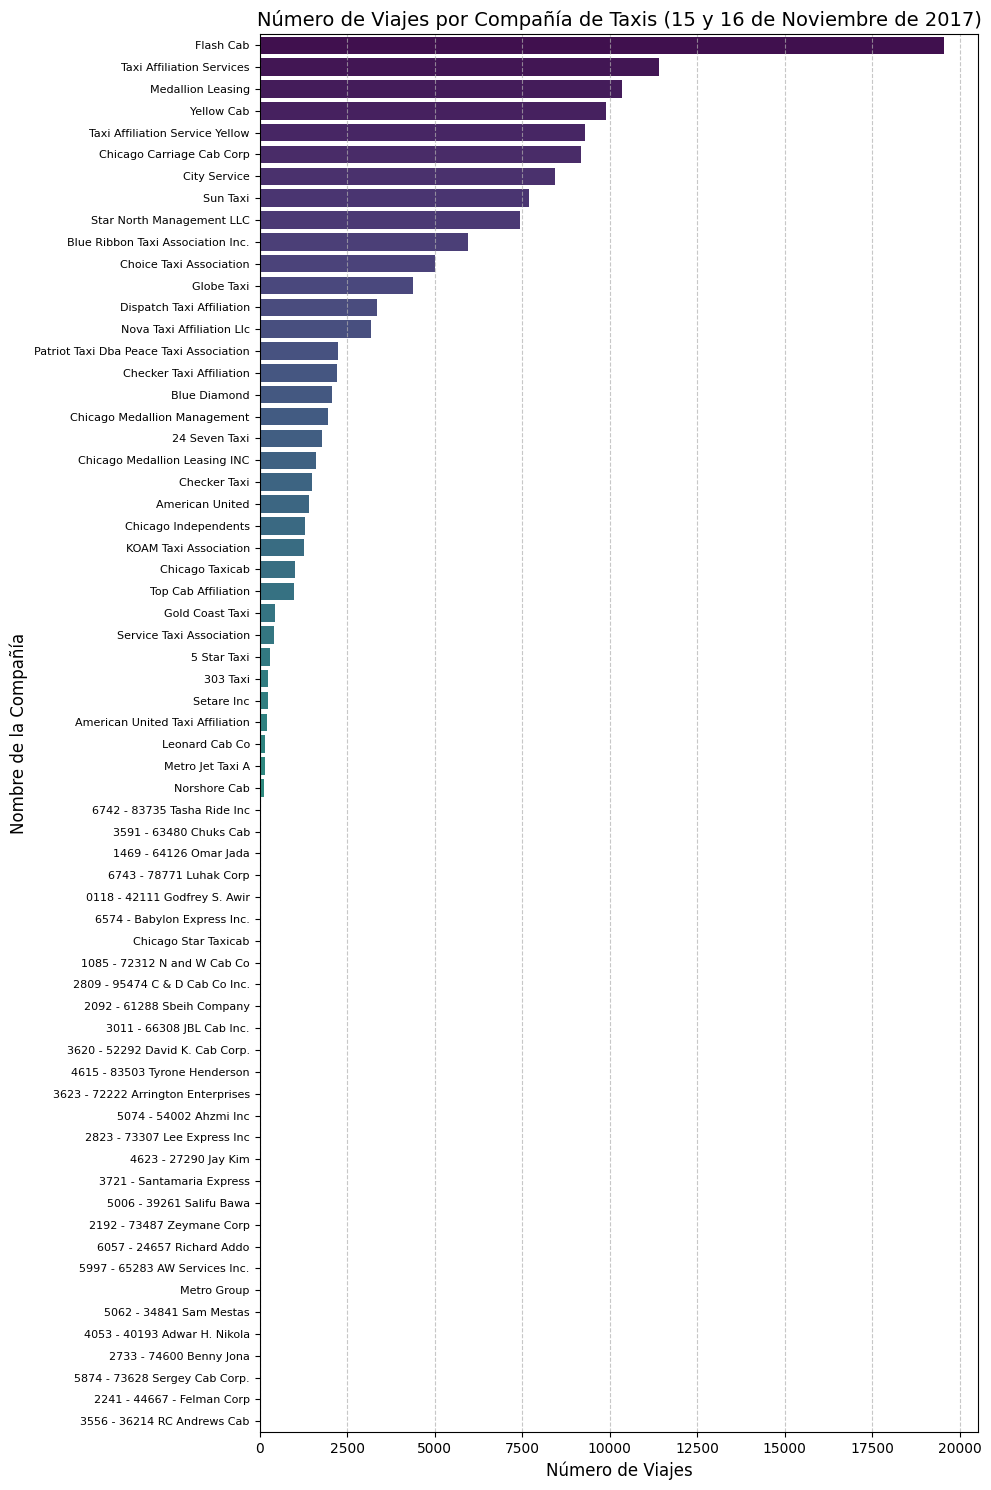

In [17]:
# Gráfico 1: Empresas de taxis y número de viajes

# trips_amount descendente con top N compañías
df_trips_companies_sorted = df_trips_companies.sort_values(by='trips_amount', ascending=False)

plt.figure(figsize=(10, 15))
sns.barplot(x='trips_amount', y='company_name', data=df_trips_companies_sorted, palette='viridis')
plt.title('Número de Viajes por Compañía de Taxis (15 y 16 de Noviembre de 2017)', fontsize=14)
plt.xlabel('Número de Viajes', fontsize=12)
plt.ylabel('Nombre de la Compañía', fontsize=12)
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Conclusiones:
- En la distribución de viajes entre compañías de taxis se observa una concentración en pocas empresas, mientras que muchas otras poseen una bajo volumen de viajes menor. 
- El mercado es dominado por pocos, validando la gran diferencia entre media y mediana de 'trips_amount'
- Esta clara asimetría o sesgo en la distribución de viajes entre compañías advierte que mientras pocas empresas concentran el mayor volumen de viajes como "Flash Cab" y "Taxi Affiliation Services" otras se caracterizan por una menor afluencia de viajes.

Esto implica: 
- Dominio del Mercado: El mercado de taxis en Chicago entre el 15 y 16 de noviembre de 2017 es dominado por un grupo exclusivo de operadoras.
- Competencia: Las compañías pequeñas compiten dentro de una porción menor del mercado (estrategias de negocio y posicionamiento poco robustas).
- Validación estadística: se confirma la distinción entre la media (2145.0) y la mediana (178.0), por valores atípicos (grandes compañías) que inflan el promedio hacia arriba.

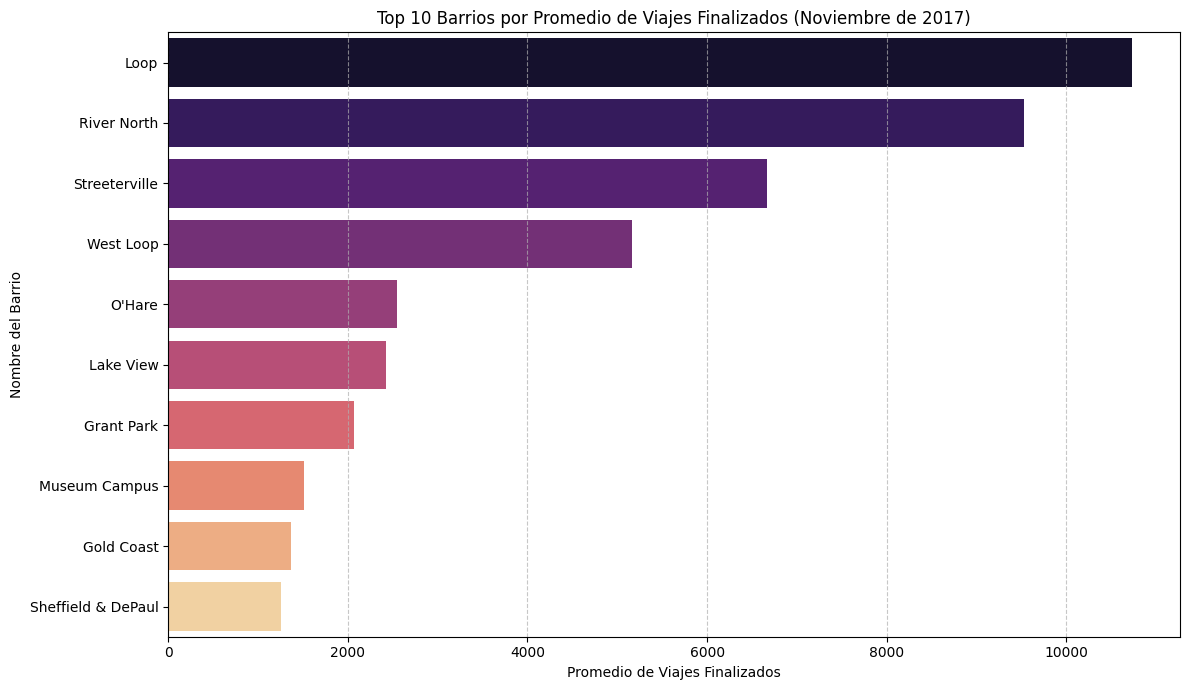

In [18]:
# Gráfico 2: Los 10 barrios principales por número de finalizaciones

plt.figure(figsize=(12, 7))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_dropoff_locations, palette='magma')
plt.title('Top 10 Barrios por Promedio de Viajes Finalizados (Noviembre de 2017)')
plt.xlabel('Promedio de Viajes Finalizados')
plt.ylabel('Nombre del Barrio')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Conclusiones:
- Los principales barrios por promedio de viajes finalizados denotan ser destinos mucho más populares en demanda dentro de la ciudad durante el mes de noviembre, 2017.
- Los barrios "top" sugieren ser posiblemente centros neurales de comercio, distritos financieros, zonas turísticas, rutas de transporte concurridas (aeropuertos) o simplemente zonas residencialesaltamente pobladas.

Esto implica:

- Zona de interés: Existen barrios Top de mayor interés y actividad económica o social. Sugiere concentrar allí los servicios de transporte.
- Plan urbana y transporte: Descubre la movilidad de la ciudad para ubicar nuevas infraestructuras de transporte, servicios públicos y negocios.
- Validación estadísticas: Confirma la disparidad entre la media de (600.0) y la mediana de (52.0) de average_trips, son pocos los barrios con gran cantidad de viajes.

### Conclusión General: Se revelan patrones en Chicago en donde existe una concentración de la actividad de taxis alta por parte de pocas empresas operadoras o aactores. así como lugares de mayor afluencia muy marcados o coincentrados en pocas zonas, datos clave para entender la dinámica de la ciudad.

# Paso 5. Prueba de hipótesis (Python)

### Importar datos y librerías para CSV 07 - última consulta. 
- Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.
- Valores:
  - start_ts: fecha y hora de la recogida
  - weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
  - duration_seconds: duración del viaje en segundos

In [22]:
import pandas as pd
import numpy as np
import scipy.stats as st
from datetime import datetime

In [23]:
df_loop_ohare_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

In [28]:
print(df_loop_ohare_trips.head())

             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0


In [25]:
 df_loop_ohare_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [26]:
# Validar 'start_ts'  como datetime
df_loop_ohare_trips['start_ts'] = pd.to_datetime(df_loop_ohare_trips['start_ts'])

In [27]:
# Verificar viajes de sábado y valores de la columna weather_conditions
print("\nConteo de condiciones climáticas:")
print(df_loop_ohare_trips['weather_conditions'].value_counts())


Conteo de condiciones climáticas:
Good    888
Bad     180
Name: weather_conditions, dtype: int64


### Hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".     

### Planteamiento de las hipótesis nula y alternativa: Hipótesis de "cambio" o "diferencia", no de "mayor que" o "menor que", por lo cual es una prueba de 2 colas.

#### - Hipótesis Nula (H_0): No hay diferencia significativa en la duración promedio de los viajes desde el Loop hasta O'Hare entre los sábados lluviosos y los sábados con buen clima.

#### - Hipótesis Alternativa (H_1): Hay una diferencia significativa en la duración promedio de los viajes desde el Loop hasta O'Hare entre los sábados lluviosos y los sábados con buen clima.


### Nivel de significación (alfa)
Alpha será el umbral para decidir si rechazamos la hipótesis nula.

#### Criterios
- Alpha = 0.05 (o 5%): Dispuestos a aceptar una probabilidad del 5% de rechazar la hipótesis nula cuando en realidad es cierta.
- Prueba t de Student para la media de dos muestras independientes (Student's t-test for two independent samples).
    - Comparar medias de 2 grupos: duración promedio en sábados lluviosos vs. duración promedio en sábados con buen clima.
    - Muestras independientes (sábados lluviosos y sábados con buen clima)
    - Normalidad o tamaño de muestra grande: Se asume que las muestras vienen de poblaciones normalmente distribuidas, pero si el tamaño es lo bastante grande (N > 30), el Teorema del Límite Central permitiría aplicar la prueba t incluso si las distribuciones no son perfectamente normales.
    - Varianzas iguales o desiguales: Prueba t de Student maneja varianzas de 2 poblaciones iguales o desiguales. La función scipy.stats.ttest_ind propicia especificar si asumimos varianzas iguales (equal_var=True) o no (equal_var=False). Es mejor utilizar equal_var=False si no estamos seguros o el tamaño de las muestras difieren mucho, o  por otro lado, podemos hacer una prueba de Levene o Barlett para la homogeneidad de varianzas. En este caso asumiremos varianzas desiguales (equal_var=False) como enfoque más robusto.

- Valor p (p-value) de la prueba t.
    - Regla de decisión: Si p-value < alpha (0.05): Se rechaza la hipótesis nula (evidencia estadística de que la duración promedio de los viajes sí cambia entre sábados, lluviosos o con buen clima.
    - Si p-value ≥ alpha (0.05): No rechazamos la hipótesis nula. No hay evidencia para decir que la duración promedio de los viajes cambia y cualquier distinción obedecería al azar.

In [31]:
# start_ts sea tipo datetime
df_loop_ohare_trips['start_ts'] = pd.to_datetime(df_loop_ohare_trips['start_ts'])

# Columna 'day_of_week' (Sábado=5)
df_loop_ohare_trips['day_of_week'] = df_loop_ohare_trips['start_ts'].dt.dayofweek
print(df_loop_ohare_trips.head())
df_loop_ohare_trips.info()
print(df_loop_ohare_trips['weather_conditions'].value_counts())
print(df_loop_ohare_trips['day_of_week'].value_counts())

             start_ts weather_conditions  duration_seconds  day_of_week
0 2017-11-25 16:00:00               Good            2410.0            5
1 2017-11-25 14:00:00               Good            1920.0            5
2 2017-11-25 12:00:00               Good            1543.0            5
3 2017-11-04 10:00:00               Good            2512.0            5
4 2017-11-11 07:00:00               Good            1440.0            5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   day_of_week         1068 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 33.5+ KB
Good    888
Bad     180
Name: weather_condit

In [32]:
import pandas as pd
import numpy as np
import scipy.stats as st # Para la prueba t de Student

# Filtro de datos en donde el Sábado=5.
saturday_trips = df_loop_ohare_trips[df_loop_ohare_trips['day_of_week'] == 5]

# Dividir viajes en 2 grupos según clima
saturday_bad_weather_trips = saturday_trips[saturday_trips['weather_conditions'] == 'Bad']
saturday_good_weather_trips = saturday_trips[saturday_trips['weather_conditions'] == 'Good']

# Tamaño de muestras
print(f"Número de viajes en sábados lluviosos ('Bad'): {len(saturday_bad_weather_trips)}")
print(f"Número de viajes en sábados con buen clima ('Good'): {len(saturday_good_weather_trips)}")

# Verificar datos
if len(saturday_bad_weather_trips) == 0 or len(saturday_good_weather_trips) == 0:
    print("\nAdvertencia: Uno o ambos grupos de sábados están vacíos. No se puede realizar la prueba de hipótesis.")
else:
    # Nivel de significación (alfa)
    alpha = 0.05
    print(f"\nNivel de significación (alpha) establecido en: {alpha}")

    # Prueba t de Student para las dos muestras independientes (prueba equal_var=False (prueba de Welch))
    # st.ttest_ind devuelve la estadística t y el p-value
    statistic, p_value = st.ttest_ind(
        saturday_bad_weather_trips['duration_seconds'],
        saturday_good_weather_trips['duration_seconds'],
        equal_var=False # Asumimos varianzas desiguales
    )

    print(f"\nEstadística T: {statistic:.2f}")
    print(f"Valor p: {p_value:.4f}")

    # Decisión según p y alfa
    print("\n--- Decisión de la Hipótesis ---")
    if p_value < alpha:
        print(f"El valor p ({p_value:.4f}) es MENOR que alpha ({alpha}).")
        print("Rechazamos la hipótesis nula (H0).")
        print("Conclusión: Hay evidencia estadística significativa para afirmar que la duración promedio de los viajes desde el Loop hasta O'Hare CAMBIA los sábados lluviosos en comparación con los sábados de buen clima.")
    else:
        print(f"El valor p ({p_value:.4f}) es MAYOR O IGUAL que alpha ({alpha}).")
        print("No rechazamos la hipótesis nula (H0).")
        print("Conclusión: No hay evidencia estadística suficiente para afirmar que la duración promedio de los viajes desde el Loop hasta O'Hare cambia los sábados lluviosos en comparación con los sábados de buen clima. Cualquier diferencia observada podría deberse al azar.")

Número de viajes en sábados lluviosos ('Bad'): 180
Número de viajes en sábados con buen clima ('Good'): 888

Nivel de significación (alpha) establecido en: 0.05

Estadística T: 7.19
Valor p: 0.0000

--- Decisión de la Hipótesis ---
El valor p (0.0000) es MENOR que alpha (0.05).
Rechazamos la hipótesis nula (H0).
Conclusión: Hay evidencia estadística significativa para afirmar que la duración promedio de los viajes desde el Loop hasta O'Hare CAMBIA los sábados lluviosos en comparación con los sábados de buen clima.
